In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [4]:
df.head()

,A,B,C
2016-07-01 00:00:00,1.485722,1.881953,0.745147
2016-07-01 00:00:01,-0.242935,0.879007,2.000828
2016-07-01 00:00:02,1.411044,-0.183298,-0.626377
2016-07-01 00:00:03,0.333380,-1.411714,1.786211
2016-07-01 00:00:04,1.011959,1.686398,0.331745


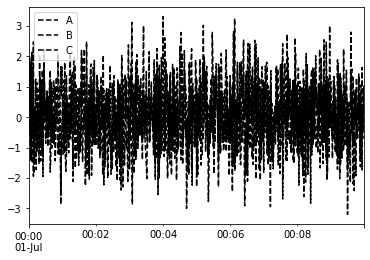

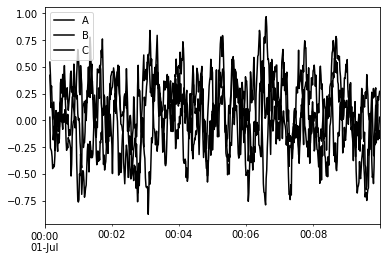

In [5]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [10]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

AttributeError: module 'pandas' has no attribute 'ewma'

In [11]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [12]:
df.head()

,A,B,C,D
2016-06-06,0.199729,1.160590,-0.128452,1.014314
2016-06-07,0.566391,-0.208602,-0.169147,0.995729
2016-06-08,-1.595213,0.085897,-0.501353,-1.055225
2016-06-09,-0.520548,0.450077,0.699032,0.550894
2016-06-10,1.089420,0.334230,0.313171,-0.512463


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E529D7C08>,
      dtype=object)

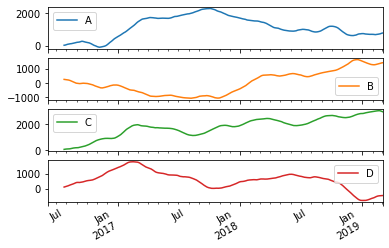

In [13]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [14]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-02-26,1.056352,1.315837,2.001809,1.363403
2019-02-27,0.928981,1.307957,2.128472,1.575767
2019-02-28,0.888925,1.178318,2.004011,1.598343
2019-03-01,0.909078,1.189078,1.674794,1.353932


In [15]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.482925,1.056289,-0.213025,1.512178
2016-06-08,0.045586,1.050154,-0.408334,1.326391
2016-06-09,-0.303221,1.159606,-0.331230,1.371221
2016-06-10,-0.294621,1.292123,-0.222333,1.295627


In [16]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [17]:
# EWMA
# Why use EWMA?

In [18]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [19]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting